# <font color='red'> 데이터 로딩

In [1]:
# 구글 드라이브 접근 권한 획득
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# 구글 드라이브 접근 확인하기
!ls -lt "/content/gdrive/My Drive/ML_basic/ML_basic_dataset"

total 4576455
-rw------- 1 root root      41253 Jul 16 02:15 LCDataDictionary_modification_3.xlsx
-rw------- 1 root root 1441750553 Jul 15 02:01 loan_seg_df_3.pkl
-rw------- 1 root root  836188793 Jul 14 14:11 loan_seg_df_2.pkl
-rw------- 1 root root 1218773813 Jul 14 09:27 loan_seg_df_1.pkl
-rw------- 1 root root      40581 Jul 14 07:03 LCDataDictionary_modification_2.xlsx
-rw------- 1 root root      39139 Jul 13 16:27 LCDataDictionary_modification_1.xlsx
-rw------- 1 root root      33741 Jul 13 09:46 LCDataDictionary_modification.xlsx
-rw------- 1 root root      23594 Jul 13 09:01 LCDataDictionary.xlsx
-rw------- 1 root root 1189395649 Jun 30 12:21 loan.csv


In [0]:
import os

# 파일 경로 설정
folder_path = r'/content/gdrive/My Drive/ML_basic/ML_basic_dataset'
fname = 'loan.csv'
fpath = folder_path + os.sep + fname

In [0]:
import pandas as pd
from datetime import datetime

In [0]:
t1 = datetime.now()

loan_df = pd.read_csv(fpath,
                        header=0,
                        # engine='python',
                        sep=',',
                        index_col=False,
                        na_filter=False,
                        encoding='utf-8',
                        # quoting=csv.QUOTE_NONE,
#                         converters=col_type_dict,
#                         dtype=object,                        
                        na_values=None,
                        keep_default_na=False,
                        # usecols=use_cols,
#                         nrows=10000,
                        )
t2 = datetime.now()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (13,24,25,27,30,31,33,34,49,56,57,58,59,60,61,62,64,66,67,68,69,70,71,72,73,74,75,78,79,81,82,83,84,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,105,106,107,108,109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
file_read_sec = (t2-t1).total_seconds()
print('파일 읽는데 걸리는 시간: {:}초'.format(file_read_sec))
print('파일 레코드 개수: {:,}건'.format(loan_df.shape[0]))
print('파일 컬럼 개수: {}개'.format(loan_df.shape[1]))

파일 읽는데 걸리는 시간: 65.552931초
파일 레코드 개수: 2,260,668건
파일 컬럼 개수: 145개


In [0]:
# 데이터 확인
loan_df.head(1)

id member_id  ...  settlement_percentage  settlement_term
0               ...                                        

[1 rows x 145 columns]

# <font color = 'red'> 변수(컬럼) 확인

* Lending Club의 변수 설명이 되어 있는 엑셀파일을 확인합니다.
  * LCDataDictionary.xlsx

* loan_df의 변수명을 확인하고, 엑셀파일에 붙여 넣습니다.

In [0]:
# loan_df의 변수명 확인
for col_idx, col_name in enumerate(loan_df.columns):
  print(col_name, col_idx+1)

* loan_df의 변수명과 엑셀파일의 변수명을 비교합니다. (엑셀에서 작업합니다.)
  * loan_df의 변수명 공백 제거
  * 엑셀파일의 변수명 공백 제거  
* 변수 비교
  * 개수
    * loan_df 145개
    * 엑셀파일 151개
  * loan_df에만 있는 변수 1개(144개 변수는 엑셀에도 있음)
    * verification_status_joint
    * 엑셀파일의 변수명이 verified_status_joint로 잘못되어 있어서 엑셀파일 수정  
  * 엑셀파일에만 있는 변수 6개(145개 변수는 loan_df에도 있음)
    * 'fico_range_high','fico_range_low','last_fico_range_high','last_fico_range_low','sec_app_fico_range_low','sec_app_fico_range_high',
    
* 변수구분
  * 활용: 신청정보, 심사정보, 대출상태
  * 미활용: 상환정보, 공동차주정보
  



# 분석 데이터 세팅

## 분석 목적

* <font color='blue'> 대출심사 시점</font>에 신청정보 및 심사정보를 활용하여 해당 대출 실행 후 <font color='blue'> (6개월 이후) 정상/부도</font>가 발생할 가능성을 예측하는 모형 개발

## 부도 정의

* 정상정의(계좌상태/loan_status)
  * Fully Paid
  * Current
  * Does not meet the credit policy. Status:Fully Paid
  * Late (16-30 days)

In [0]:
# 계좌상태 확인
var_name = 'loan_status'
temp_vc_df = loan_df[var_name].value_counts(dropna=False).rename_axis(var_name).reset_index(name='counts')
temp_vc_df

loan_status   counts
0                                         Fully Paid  1041952
1                                            Current   919695
2                                        Charged Off   261655
3                                 Late (31-120 days)    21897
4                                    In Grace Period     8952
5                                  Late (16-30 days)     3737
6  Does not meet the credit policy. Status:Fully ...     1988
7  Does not meet the credit policy. Status:Charge...      761
8                                            Default       31

In [0]:
# 부도 정상 정의
good_loan_status = ['Fully Paid', 'Current', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Fully Paid']
loan_df['Y'] = loan_df['loan_status'].apply(lambda x: 1 if x not in good_loan_status else 0)

In [0]:
loan_df['Y'].value_counts()

0    1967372
1     293296
Name: Y, dtype: int64

## 불필요한 레코드 제거

* 분석의 편의성을 위해 공동대출 레코드 삭제
```python
application_type != 'Individual' 
```
* 대출실행 이후 12개월 미만 레코드 삭제
```python
'2019.02' - issue_d  < 12
```


### 개인대출만 활용

In [0]:
# 개인대출신청만 사용
print('Before 레코드 {:,}건 -> '.format(loan_df.shape[0]), end=' ')
loan_seg_df = loan_df[loan_df['application_type'] == 'Individual'].copy()
print('After 레코드 {:,}건'.format(loan_seg_df.shape[0]))

Before 레코드 2,260,668건 ->  After 레코드 2,139,958건


### 개설 후 6개월 초과건만 활용

* 미해지 계좌: 'Current', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Default'
* 최근 신용조회일: 2019년 2월(2월말 가정)
  * 데이터 확인 결과 2019년 3월 조회 7건 존재함
* 개설 후 6개월 이하 삭제: 2018년 8월 개설부터 삭제(8월말 가정)

In [0]:
# 신용조회년월 컬럼 확인
var_name = 'last_credit_pull_d'
temp_vc_df = loan_seg_df[var_name].value_counts(dropna=False).rename_axis(var_name).reset_index(name='counts')
temp_vc_df.head()

last_credit_pull_d   counts
0           Feb-2019  1293968
1           Jan-2019    75556
2           Jul-2018    55521
3           Oct-2016    51232
4           Dec-2018    50316

In [0]:
temp_vc_df.tail()

last_credit_pull_d  counts
136           Dec-2007       2
137           Feb-2008       2
138           Jun-2008       1
139           Jul-2007       1
140           Jul-2008       1

In [0]:
# 최초/최근 신용조회년월 확인
print('최초', min(loan_seg_df['last_credit_pull_d'].values))
print('최근', max(loan_seg_df['last_credit_pull_d'].values))

# 공란이 포함되어 있음
# 데이터 타입이 문자열로 되어있어서 파악이 정상적으로 안됨

최초 
최근 Sep-2018


In [0]:
# 신용조회년월 공란 데이터 확인
temp_df = loan_seg_df[loan_seg_df['last_credit_pull_d']==''].copy()
print('공란 레코드 건수', temp_df.shape[0])

공란 레코드 건수 72


In [0]:
# 신용조회년월 공란 데이터 삭제
print('Before 레코드 {:,}건 -> '.format(loan_seg_df.shape[0]), end=' ')
loan_seg_df = loan_seg_df[loan_seg_df['last_credit_pull_d']!=''].copy()
print('After 레코드 {:,}건 -> '.format(loan_seg_df.shape[0]))

Before 레코드 2,139,958건 ->  After 레코드 2,139,886건 -> 


In [0]:
# 신용조회년월 컬럼을 날짜타입으로 변환
from datetime import datetime 
loan_seg_df['credit_yymmdd'] = loan_seg_df['last_credit_pull_d'].apply(lambda x: datetime.strptime(x, '%b-%Y').date())

In [0]:
loan_seg_df[['last_credit_pull_d', 'credit_yymmdd']].head()

last_credit_pull_d credit_yymmdd
0           Feb-2019    2019-02-01
1           Feb-2019    2019-02-01
2           Feb-2019    2019-02-01
3           Feb-2019    2019-02-01
4           Feb-2019    2019-02-01

In [0]:
# 신용조회년월 컬럼을 날짜타입으로 변환
loan_seg_df['credit_yymm'] = loan_seg_df['credit_yymmdd'].apply(lambda x: datetime.strftime(x, '%Y%m%d')[:6])

In [0]:
# 최초/최근 신용조회년월(날짜타입) 확인
print('최초', min(loan_seg_df['credit_yymm'].values))
print('최근', max(loan_seg_df['credit_yymm'].values))

최초 200705
최근 201903


In [0]:
# 신용조회년월 컬럼 확인
var_name = 'credit_yymm'
temp_vc_df = loan_seg_df[var_name].value_counts(dropna=False).rename_axis(var_name).reset_index(name='counts')
temp_vc_df.sort_values(by=['credit_yymm'], axis=0, inplace=True, ascending=False)
temp_vc_df.head()

credit_yymm   counts
129      201903        7
0        201902  1293968
1        201901    75556
4        201812    50316
6        201811    46922

In [0]:
temp_vc_df.tail()

credit_yymm  counts
131      200709       4
117      200708      17
139      200707       1
120      200706      15
126      200705      10

In [0]:
# 조회년월 201903 레코드 삭제
loan_seg_df = loan_seg_df[loan_seg_df['credit_yymm']!='201903'].copy()

In [0]:
# 미해제 여부 컬럼 추가
curr_loan_status = ['Current', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Default']
loan_seg_df['loan_status_curr_fg'] = loan_seg_df['loan_status'].isin(curr_loan_status)
loan_seg_df['loan_status_curr_fg'].value_counts()

False    1283060
True      856819
Name: loan_status_curr_fg, dtype: int64

In [0]:
# 미해제 여부 컬럼 검증
var_name = 'loan_status'
temp_vc_df = loan_seg_df[var_name].value_counts(dropna=False).rename_axis(var_name).reset_index(name='counts')
temp_vc_df

loan_status   counts
0                                         Fully Paid  1024396
1                                            Current   825894
2                                        Charged Off   255917
3                                 Late (31-120 days)    19716
4                                    In Grace Period     7862
5                                  Late (16-30 days)     3323
6  Does not meet the credit policy. Status:Fully ...     1986
7  Does not meet the credit policy. Status:Charge...      761
8                                            Default       24

In [0]:
# 개설 년월 컬럼을 날짜타입으로 변환
loan_seg_df['issue_yymmdd'] = loan_seg_df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%Y').date())
loan_seg_df['issue_yymm'] = loan_seg_df['issue_yymmdd'].apply(lambda x: datetime.strftime(x, '%Y%m%d')[:6])

In [0]:
# 미해제 & 201808이후 레코드 선별
del_filter = (loan_seg_df['loan_status_curr_fg']) & (loan_seg_df['issue_yymm']>='201808')
del_filter.value_counts()

False    1962274
True      177605
dtype: int64

In [0]:
# 미해제 & 201808이후 레코드 삭제
print('Before 레코드 {:,}건 -> '.format(loan_seg_df.shape[0]), end=' ')
loan_seg_df = loan_seg_df[~del_filter].copy()
print('After 레코드 {:,}건'.format(loan_seg_df.shape[0]))

Before 레코드 2,139,879건 ->  

NameError: ignored

In [0]:
# 현재까지 작업한 내용 피클파일로 저장
folder_path = r'/content/gdrive/My Drive/ML_basic/ML_basic_dataset'
pkl_fname = 'loan_seg_df_1.pkl'
pkl_fpath = folder_path + os.sep + fname
loan_seg_df.to_pickle(pkl_fpath)

In [0]:
# 데이터 프레임 확인
%whos DataFrame

Variable      Type         Data/Info
------------------------------------
loan_df       DataFrame            id member_id  loa<...>60668 rows x 146 columns]
loan_seg_df   DataFrame            id member_id  loa<...>39879 rows x 151 columns]
temp_df       DataFrame            id member_id  loa<...>\n[72 rows x 146 columns]
temp_vc_df    DataFrame                             <...>         Default       24


In [0]:
# 메모리 관리를 위해 전체 데이터 삭제
del loan_df

In [0]:
# 데이터 프레임 확인
%whos DataFrame

Variable      Type         Data/Info
------------------------------------
loan_seg_df   DataFrame            id member_id  loa<...>39879 rows x 151 columns]
temp_df       DataFrame            id member_id  loa<...>\n[72 rows x 146 columns]
temp_vc_df    DataFrame                             <...>         Default       24


In [0]:
# 피클파일 읽기
folder_path = r'/content/gdrive/My Drive/ML_basic/ML_basic_dataset'
pkl_fname = 'loan_seg_df_1.pkl'
pkl_fpath = folder_path + os.sep + pkl_fname
loan_seg_df = pd.read_pickle(pkl_fpath)

In [0]:
loan_seg_df.shape

In [0]:
print(loan_seg_df.shape)
print(loan_seg_df2.shape)
loan_seg_df2.head(1)

(1962274, 95)
(1962274, 95)


id member_id  loan_amnt  ...  loan_status_curr_fg  issue_yymmdd issue_yymm
186                    4500  ...                False    2018-12-01     201812

[1 rows x 95 columns]

In [0]:
del loan_seg_df2

In [0]:
# 데이터 프레임 확인
%whos DataFrame

Variable      Type         Data/Info
------------------------------------
df            DataFrame        c1\n0  0.0\n1  1.0\n2  2.0
loan_seg_df   DataFrame            id member_id  loa<...>962274 rows x 95 columns]


## 불필요한 컬럼 제거



* 대출심사 시점에 알수 없는 상환정보, 공동차주정보 컬럼 삭제

In [0]:
del_cols = [
'verification_status_joint',
'sec_app_earliest_cr_line',
'annual_inc_joint',
'dti_joint',
'revol_bal_joint',
'sec_app_inq_last_6mths',
'sec_app_mort_acc',
'sec_app_open_acc',
'sec_app_revol_util',
'sec_app_open_act_il',
'sec_app_num_rev_accts',
'sec_app_chargeoff_within_12_mths',
'sec_app_collections_12_mths_ex_med',
'sec_app_mths_since_last_major_derog',
'loan_status',
'pymnt_plan',
'last_pymnt_d',
'next_pymnt_d',
'last_credit_pull_d',
'hardship_flag',
'hardship_type',
'hardship_reason',
'hardship_status',
'hardship_start_date',
'hardship_end_date',
'hardship_loan_status',
'out_prncp',
'out_prncp_inv',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'last_pymnt_amnt',
'mths_since_last_major_derog',
'hardship_amount',
'hardship_length',
'hardship_dpd',
'hardship_payoff_balance_amount',
'hardship_last_payment_amount',
'recoveries',
'collection_recovery_fee',
'collections_12_mths_ex_med',
'tot_coll_amt',
'tot_cur_bal',
'delinq_amnt',
'deferral_term',
'payment_plan_start_date',
'orig_projected_additional_accrued_interest',
'debt_settlement_flag',
'debt_settlement_flag_date',
'settlement_status',
'settlement_date',
'settlement_amount',
'settlement_percentage',
'settlement_term',
]

In [0]:
loan_seg_df.drop(columns=del_cols, inplace=True)

In [0]:
loan_seg_df.shape

(1962274, 95)

In [0]:
# 현재까지 작업한 내용 피클파일로 저장
folder_path = r'/content/gdrive/My Drive/ML_basic/ML_basic_dataset'
pkl_fname = 'loan_seg_df_2.pkl'
pkl_fpath = folder_path + os.sep + pkl_fname
print(pkl_fpath)
loan_seg_df.to_pickle(pkl_fpath)

'/content/gdrive/My Drive/ML_basic/ML_basic_dataset/loan_seg_df_2.pkl'

In [9]:
# 피클파일 읽기
folder_path = r'/content/gdrive/My Drive/ML_basic/ML_basic_dataset'
pkl_fname = 'loan_seg_df_2.pkl'
pkl_fpath = folder_path + os.sep + pkl_fname
print(pkl_fpath)
loan_seg_df = pd.read_pickle(pkl_fpath)
loan_seg_df.shape

/content/gdrive/My Drive/ML_basic/ML_basic_dataset/loan_seg_df_2.pkl


(1962274, 95)

In [0]:
# del loan_seg_df3

# <font color='red'> 데이터 타입 세팅

## 컬럼 데이터 타입 확인

* 컬럼의 데이터 타입 변환
  * pd.read_csv()에서 자동으로 감지되는 데이터 타입
  * 의미상 숫자 컬럼이지만 공란 또는 문자가 입력되는 경우 문자 타입으로 load됨
  * 숫자 컬럼으로 변환 필요

In [0]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:,.2f}'.format

In [10]:
# describe 함수: 숫자 컬럼 요약 >> 의미상 숫자컬럼이 더 많지만 read_csv()로 loading시 문자 컬럼으로 인식됨
loan_seg_df.describe()

loan_amnt  funded_amnt  ...  policy_code            Y
count 1,962,274.00 1,962,274.00  ... 1,962,274.00 1,962,274.00
mean     14,719.14    14,713.08  ...         1.00         0.14
std       8,951.03     8,948.64  ...         0.00         0.35
min         500.00       500.00  ...         1.00         0.00
25%       8,000.00     8,000.00  ...         1.00         0.00
50%      12,175.00    12,150.00  ...         1.00         0.00
75%      20,000.00    20,000.00  ...         1.00         0.00
max      40,000.00    40,000.00  ...         1.00         1.00

[8 rows x 8 columns]

In [0]:
# info() 함수를 활용하여 컬럼별 데이터 타입을 확인
loan_seg_df.info()

In [13]:
# "년소득" 숫타 타입으로 변환이 불가한 데이터 확인
annual_inc_values = set(loan_seg_df['annual_inc'].values)
not_numeric_values = list()
for val in annual_inc_values:
  try:
    numeric_val = float(val)
  except:
    not_numeric_values.append(val)
    
print('숫자 타입이 아닌 데이터 {}개'.format(len(not_numeric_values)))
print(not_numeric_values)

숫자 타입이 아닌 데이터 4개
['', '', '', '']


## 컬럼 데이터 타입 변환

* 데이터 타입 변환 : 문자 > 숫자
  * [pd.to_numeric()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html#pandas.to_numeric)
  * [Series.fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html?highlight=fillna#pandas.Series.fillna)

In [0]:
# "년소득" 숫자 타입 변환 예시
loan_seg_df['annual_inc'] = pd.to_numeric(loan_seg_df['annual_inc'], errors='coerce').fillna(0)

In [15]:
# 변환 결과 확인
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:,.2f}'.format
loan_seg_df.describe()

loan_amnt  funded_amnt  ...  policy_code            Y
count 1,962,274.00 1,962,274.00  ... 1,962,274.00 1,962,274.00
mean     14,719.14    14,713.08  ...         1.00         0.14
std       8,951.03     8,948.64  ...         0.00         0.35
min         500.00       500.00  ...         1.00         0.00
25%       8,000.00     8,000.00  ...         1.00         0.00
50%      12,175.00    12,150.00  ...         1.00         0.00
75%      20,000.00    20,000.00  ...         1.00         0.00
max      40,000.00    40,000.00  ...         1.00         1.00

[8 rows x 9 columns]

## 데이터 타입 일괄 변환

### 신청정보 일괄 변환

In [0]:
# 신청정보
app_num_cols = [
'loan_amnt',
'annual_inc',
    
]
app_cat_cols = [
'id',
'member_id',
'emp_title',
'home_ownership',
'url',
'desc',
'purpose',
'title',
'zip_code',
'addr_state',
'initial_list_status',
'policy_code',
'application_type',
'emp_length',   
    
    
]

In [0]:
for num_col in app_num_cols:  
  loan_seg_df[num_col] = pd.to_numeric(loan_seg_df[num_col], errors='coerce').fillna(0)

In [19]:
loan_seg_df[app_num_cols].describe()

loan_amnt     annual_inc
count 1,962,274.00   1,962,274.00
mean     14,719.14      78,485.85
std       8,951.03     116,105.35
min         500.00           0.00
25%       8,000.00      47,000.00
50%      12,175.00      65,000.00
75%      20,000.00      94,000.00
max      40,000.00 110,000,000.00

### 심사정보 일괄 변환

In [0]:
# 심사정보
screen_num_cols = [
'mths_since_last_record',
'pub_rec',
'chargeoff_within_12_mths',
'pub_rec_bankruptcies',
'tax_liens',
'dti',
'open_acc',
'total_acc',
'avg_cur_bal',
'mo_sin_rcnt_tl',
'num_sats',
'num_tl_op_past_12m',
'tot_hi_cred_lim',
'total_bal_ex_mort',
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'num_op_rev_tl',
'revol_bal',
'max_bal_bc',
'num_rev_accts',
'revol_util',
'total_rev_hi_lim',
'delinq_2yrs',
'mths_since_last_delinq',
'acc_now_delinq',
'mths_since_recent_revol_delinq',
'num_accts_ever_120_pd',
'num_tl_120dpd_2m',
'num_tl_30dpd',
'num_tl_90g_dpd_24m',
'inq_last_6mths',
'inq_fi',
'inq_last_12m',
'mths_since_recent_inq',
'mort_acc',
'bc_open_to_buy',
'mths_since_recent_bc',
'num_actv_bc_tl',
'num_bc_sats',
'num_bc_tl',
'mths_since_recent_bc_dlq',
'bc_util',
'percent_bc_gt_75',
'total_bc_limit',
'open_act_il',
'total_cu_tl',
'num_actv_rev_tl',
'num_rev_tl_bal_gt_0',
'open_acc_6m',
'open_rv_12m',
'open_rv_24m',
'acc_open_past_24mths',
'all_util',
'num_il_tl',
'open_il_12m',
'open_il_24m',
'mths_since_rcnt_il',
'mo_sin_old_il_acct',
'total_bal_il',
'il_util',
'total_il_high_credit_limit',
'pct_tl_nvr_dlq',
    
]
screen_cat_cols = [
'earliest_cr_line',
'grade',
'sub_grade',
'verification_status',    
]

In [0]:
for num_col in screen_num_cols:  
  loan_seg_df[num_col] = pd.to_numeric(loan_seg_df[num_col], errors='coerce').fillna(0)

In [22]:
loan_seg_df[screen_num_cols].describe()

mths_since_last_record  ...  pct_tl_nvr_dlq
count            1,962,274.00  ...    1,962,274.00
mean                    11.60  ...           90.66
std                     28.35  ...           19.62
min                      0.00  ...            0.00
25%                      0.00  ...           90.00
50%                      0.00  ...           97.40
75%                      0.00  ...          100.00
max                    129.00  ...          100.00

[8 rows x 62 columns]

### 실행정보 일괄 변환

In [0]:
# 실행정보
open_num_cols = [
'funded_amnt',
'funded_amnt_inv',
'int_rate',
'installment',    
]
open_cat_cols = [
'term',
'issue_d',
'disbursement_method',    
]

In [0]:
for num_col in open_num_cols:  
  loan_seg_df[num_col] = pd.to_numeric(loan_seg_df[num_col], errors='coerce').fillna(0)

In [0]:
loan_seg_df[open_num_cols].describe()

funded_amnt  funded_amnt_inv      int_rate   installment
count  1.962274e+06     1.962274e+06  1.962274e+06  1.962274e+06
mean   1.471308e+04     1.469264e+04  1.308657e+01  4.380534e+02
std    8.948645e+03     8.952648e+03  4.764537e+00  2.619215e+02
min    5.000000e+02     0.000000e+00  5.310000e+00  4.930000e+00
25%    8.000000e+03     8.000000e+03  9.580000e+00  2.490800e+02
50%    1.215000e+04     1.207500e+04  1.262000e+01  3.731700e+02
75%    2.000000e+04     2.000000e+04  1.580000e+01  5.792775e+02
max    4.000000e+04     4.000000e+04  3.099000e+01  1.719830e+03

### 나머지 컬럼 확인

In [26]:
['1', '2'] + ['ING']

['1', '2', 'ING']

In [27]:
{'1', '2'} - {'2', '3'}

{'1'}

In [0]:
# 확인된 컬럼
checked_cols = app_num_cols + app_cat_cols + screen_num_cols + screen_cat_cols + open_num_cols + open_cat_cols
checked_col_set = set(checked_cols)

# 전체 컬럼
total_cols = list(loan_seg_df.columns)
total_col_set = set(total_cols)

# 나머지 컬럼
unchecked_col_set = total_col_set - checked_col_set
unchecked_col_set

{'Y',
 'credit_yymm',
 'credit_yymmdd',
 'issue_yymm',
 'issue_yymmdd',
 'loan_status_curr_fg'}

In [0]:
# 현재까지 작업한 내용 피클파일로 저장
folder_path = r'/content/gdrive/My Drive/ML_basic/ML_basic_dataset'
pkl_fname = 'loan_seg_df_3.pkl'
pkl_fpath = folder_path + os.sep + pkl_fname
print(pkl_fpath)
loan_seg_df.to_pickle(pkl_fpath)

/content/gdrive/My Drive/ML_basic/ML_basic_dataset/loan_seg_df_3.pkl


In [28]:
# 피클파일 읽기
folder_path = r'/content/gdrive/My Drive/ML_basic/ML_basic_dataset'
pkl_fname = 'loan_seg_df_3.pkl'
pkl_fpath = folder_path + os.sep + pkl_fname
print(pkl_fpath)
loan_seg_df = pd.read_pickle(pkl_fpath)
loan_seg_df.shape

/content/gdrive/My Drive/ML_basic/ML_basic_dataset/loan_seg_df_3.pkl


(1962274, 95)

# <font color='red'> 데이터 탐색

* 요약표(Aggregation)를 이용한 데이터 탐색
* 그래프(Chart)를 이용한 데이터 탐색

## 요약표를 이용한 데이터 탐색

### value_counts

* [Series.value_count()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html?highlight=value_counts#pandas.Series.value_counts)
  * 빈도 또는 구성비 확인
  * 함께 사용하는 함수
    * [Series.rename_axis](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rename_axis.html?highlight=rename_axis#pandas.Series.rename_axis)
    * [Series.reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.reset_index.html?highlight=reset_index#pandas.Series.reset_index)

In [0]:
# 빈도 확인 예시
loan_seg_df['home_ownership'].value_counts(dropna=False, normalize=False)

MORTGAGE    949381
RENT        790914
OWN         221183
ANY            563
OTHER          182
NONE            51
Name: home_ownership, dtype: int64

In [29]:
# 구성비 확인 예시
type(loan_seg_df['home_ownership'].value_counts(dropna=False, normalize=True))

pandas.core.series.Series

In [0]:
# 빈도를 df로 저장
ho_freq = loan_seg_df['home_ownership'].value_counts(dropna=False, normalize=False).rename_axis(index='home_ownership').reset_index(name='counts')
ho_freq

home_ownership  counts
0       MORTGAGE  949381
1           RENT  790914
2            OWN  221183
3            ANY     563
4          OTHER     182
5           NONE      51

In [0]:
# 구성비를 df로 저장
ho_ratio = loan_seg_df['home_ownership'].value_counts(dropna=False, normalize=True).rename_axis(index='home_ownership').reset_index(name='ratio')
ho_ratio

home_ownership  ratio
0       MORTGAGE   0.48
1           RENT   0.40
2            OWN   0.11
3            ANY   0.00
4          OTHER   0.00
5           NONE   0.00

* [Series.value_count()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html?highlight=value_counts#pandas.Series.value_counts)
  * bins 옵션을 활용하여 숫자 변수 확인

In [0]:
# 10의 구간으로 빈도 확인
la_freq = loan_seg_df['loan_amnt'].value_counts(dropna=False, normalize=False, bins=10).rename_axis(index='loan_amnt').reset_index(name='counts')
la_freq


loan_amnt  counts
0   (8400.0, 12350.0]  426493
1    (4450.0, 8400.0]  391345
2  (12350.0, 16300.0]  297651
3  (16300.0, 20250.0]  238311
4   (460.499, 4450.0]  166681
5  (20250.0, 24200.0]  131237
6  (24200.0, 28150.0]  118018
7  (32100.0, 36050.0]   90830
8  (28150.0, 32100.0]   79585
9  (36050.0, 40000.0]   22123

In [0]:
# 10의 구간으로 구성비 확인
la_ratio = loan_seg_df['loan_amnt'].value_counts(dropna=False, normalize=True, bins=10, sort=False).rename_axis(index='loan_amnt').reset_index(name='ratio')
la_ratio


loan_amnt  ratio
0   (460.499, 4450.0]   0.08
1    (4450.0, 8400.0]   0.20
2   (8400.0, 12350.0]   0.22
3  (12350.0, 16300.0]   0.15
4  (16300.0, 20250.0]   0.12
5  (20250.0, 24200.0]   0.07
6  (24200.0, 28150.0]   0.06
7  (28150.0, 32100.0]   0.04
8  (32100.0, 36050.0]   0.05
9  (36050.0, 40000.0]   0.01

### groupby()

#### 범주형 변수

* [DataFrame.groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html?highlight=groupby#pandas.DataFrame.groupby)
  * 관측치수, 부도율 한번에 계산 가능
  
* [groupby 공식 설명](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
* [groupby 블로그](https://medium.com/analytics-vidhya/split-apply-combine-strategy-for-data-mining-4fd6e2a0cc99)

![split-apply-combine](https://docs.google.com/uc?export=download&id=1JEWqZ1-aubm7fx2naO82I4V3SoASKRUN)

In [30]:
total_record_cnt = loan_seg_df.shape[0]
total_bad_cnt = sum(loan_seg_df['Y'].values)
print('전체 부도율: ', total_bad_cnt/total_record_cnt)

전체 부도율:  0.14386573944311548


In [32]:
# 거주형태별 요약표 생성
target_var = 'home_ownership'
temp_df = loan_seg_df[[target_var, 'Y']].copy()
grp_df = temp_df.groupby([target_var], as_index=False).agg(
    {
        'Y': [('total_cnt', 'count'), ('bad_cnt', 'sum'), ]
    }
)
grp_df.columns = [target_var, 'total_cnt', 'bad_cnt']
grp_df

home_ownership  total_cnt  bad_cnt
0            ANY        563       65
1       MORTGAGE     949381   119643
2           NONE         51        8
3          OTHER        182       38
4            OWN     221183    31561
5           RENT     790914   130989

In [0]:
# 구성비/불량율 계산
grp_df['ratio'] = grp_df['total_cnt']/total_record_cnt
grp_df['bad_rate'] = grp_df['bad_cnt']/grp_df['total_cnt']
grp_df.sort_values(['bad_rate'])

home_ownership  total_cnt  bad_cnt  ratio  bad_rate
0            ANY        563       65   0.00      0.12
1       MORTGAGE     949381   119643   0.48      0.13
4            OWN     221183    31561   0.11      0.14
2           NONE         51        8   0.00      0.16
5           RENT     790914   130989   0.40      0.17
3          OTHER        182       38   0.00      0.21

In [33]:
# 등급별 요약표 생성
target_var = 'grade'
temp_df = loan_seg_df[[target_var, 'Y']].copy()
grp_df = temp_df.groupby([target_var], as_index=False).agg(
    {
        'Y': [('total_cnt', 'count'), ('bad_cnt', 'sum'), ]
    }
)
grp_df.columns = [target_var, 'total_cnt', 'bad_cnt']

# 구성비/불량율 계산
grp_df['ratio'] = grp_df['total_cnt']/total_record_cnt
grp_df['bad_rate'] = grp_df['bad_cnt']/grp_df['total_cnt']
grp_df.sort_values(['bad_rate'])


grade  total_cnt  bad_cnt  ratio  bad_rate
0     A     355863    15052   0.18      0.04
1     B     581043    56002   0.30      0.10
2     C     570734    90591   0.29      0.16
3     D     282332    63896   0.14      0.23
4     E     121869    37260   0.06      0.31
5     F      39148    14823   0.02      0.38
6     G      11285     4680   0.01      0.41

#### 숫자형 변수(건수, 계좌수 등 정수)

* [cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html?highlight=cut#pandas.cut)
  * 미리 정해진 구간값을 이용하여 구간화

In [0]:
# 등급별 요약표 생성
target_var = 'inq_last_12m'
temp_df = loan_seg_df[[target_var, 'Y']].copy()
grp_df = temp_df.groupby([target_var], as_index=False).agg(
    {
        'Y': [('total_cnt', 'count'), ('bad_cnt', 'sum'), ]
    }
)
grp_df.columns = [target_var, 'total_cnt', 'bad_cnt']

# 구성비/불량율 계산
grp_df['ratio'] = grp_df['total_cnt']/total_record_cnt
grp_df['bad_rate'] = grp_df['bad_cnt']/grp_df['total_cnt']
grp_df.sort_values(['bad_rate'])


In [0]:
bins=[0, 1, 2, 3, 4, 5, 6, 7,8,9,100000]

In [0]:
# 12개월내 조회건수 요약표 생성
target_var = 'inq_last_12m'
temp_df = loan_seg_df[[target_var, 'Y']].copy()
temp_df['bin_name'] = pd.cut(temp_df[target_var], bins, duplicates='drop', right=False)
temp_df.head(2)

inq_last_12m  Y bin_name
186          3.00  0   [3, 4)
269          0.00  0   [0, 1)

In [0]:
grp_df = temp_df.groupby(['bin_name'], as_index=False).agg(
    {
        'Y': [('total_cnt', 'count'), ('bad_cnt', 'sum'), ]
    }
)
grp_df.columns = [target_var, 'total_cnt', 'bad_cnt']
grp_df

inq_last_12m  total_cnt  bad_cnt
0       [0, 1)    1170793   178273
1       [1, 2)     266926    29264
2       [2, 3)     187935    23446
3       [3, 4)     123404    17311
4       [4, 5)      77617    11453
5       [5, 6)      48142     7456
6       [6, 7)      30341     4882
7       [7, 8)      19127     3203
8       [8, 9)      12512     2161
9  [9, 100000)      25477     4855

In [0]:
# 구성비/불량율 계산
grp_df['ratio'] = grp_df['total_cnt']/total_record_cnt
grp_df['bad_rate'] = grp_df['bad_cnt']/grp_df['total_cnt']
grp_df.sort_values(['bad_rate'])

inq_last_12m  total_cnt  bad_cnt  ratio  bad_rate
1       [1, 2)     266926    29264   0.14      0.11
2       [2, 3)     187935    23446   0.10      0.12
3       [3, 4)     123404    17311   0.06      0.14
4       [4, 5)      77617    11453   0.04      0.15
0       [0, 1)    1170793   178273   0.60      0.15
5       [5, 6)      48142     7456   0.02      0.15
6       [6, 7)      30341     4882   0.02      0.16
7       [7, 8)      19127     3203   0.01      0.17
8       [8, 9)      12512     2161   0.01      0.17
9  [9, 100000)      25477     4855   0.01      0.19

In [0]:
# 최근2년내 30일이상 연체회수 요약표 생성
target_var = 'delinq_2yrs'
temp_df = loan_seg_df[[target_var, 'Y']].copy()
temp_df['bin_name'] = pd.cut(temp_df[target_var], bins, duplicates='drop', right=False)
grp_df = temp_df.groupby(['bin_name'], as_index=False).agg(
    {
        'Y': [('total_cnt', 'count'), ('bad_cnt', 'sum'), ]
    }
)
grp_df.columns = [target_var, 'total_cnt', 'bad_cnt']

# 구성비/불량율 계산
grp_df['ratio'] = grp_df['total_cnt']/total_record_cnt
grp_df['bad_rate'] = grp_df['bad_cnt']/grp_df['total_cnt']
grp_df.sort_values(['bad_rate'])

delinq_2yrs  total_cnt  bad_cnt  ratio  bad_rate
0       [0, 1)    1586041   223335   0.81      0.14
1       [1, 2)     249661    38002   0.13      0.15
2       [2, 3)      73185    11857   0.04      0.16
8       [8, 9)       1126      186   0.00      0.17
6       [6, 7)       3405      566   0.00      0.17
4       [4, 5)      11981     2025   0.01      0.17
3       [3, 4)      26666     4527   0.01      0.17
9  [9, 100000)       2317      402   0.00      0.17
5       [5, 6)       6006     1058   0.00      0.18
7       [7, 8)       1886      346   0.00      0.18

#### 숫자형 변수(금액)

[qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html?highlight=qcut#pandas.qcut)
  * 10퍼센타일 단위로 구간화

In [0]:
total_record_cnt = loan_seg_df.shape[0]

# 총 대출잔액(주택담보대출 제외) 요약표 생성
target_var = 'total_bal_ex_mort'
temp_df = loan_seg_df[[target_var, 'Y']].copy()
temp_df['bin_name'] = pd.qcut(temp_df[target_var], 10, duplicates='drop')
grp_df = temp_df.groupby(['bin_name'], as_index=False).agg(
    {
        'Y': [('total_cnt', 'count'), ('bad_cnt', 'sum'), ]
    }
)
grp_df.columns = [target_var, 'total_cnt', 'bad_cnt']

# 구성비/불량율 계산
grp_df['ratio'] = grp_df['total_cnt']/total_record_cnt
grp_df['bad_rate'] = grp_df['bad_cnt']/grp_df['total_cnt']
grp_df.sort_values(['bad_rate'])

total_bal_ex_mort  total_cnt  bad_cnt     ratio  bad_rate
9  (101010.0, 3408095.0]     196223    25910  0.099998  0.132044
0       (-0.001, 8966.3]     196228    26228  0.100000  0.133661
1      (8966.3, 16301.0]     196228    27252  0.100000  0.138879
8    (71376.0, 101010.0]     196227    28248  0.100000  0.143956
2     (16301.0, 22901.0]     196255    28376  0.100014  0.144587
3     (22901.0, 29473.0]     196209    28970  0.099991  0.147649
7     (55673.0, 71376.0]     196218    29055  0.099995  0.148075
4     (29473.0, 36615.0]     196220    29237  0.099996  0.149001
5     (36615.0, 44948.0]     196236    29454  0.100004  0.150095
6     (44948.0, 55673.0]     196230    29574  0.100001  0.150711

In [36]:
total_record_cnt = loan_seg_df.shape[0]

# dti 요약표 생성
target_var = 'dti'
temp_df = loan_seg_df[[target_var, 'Y']].copy()
temp_df['bin_name'] = pd.qcut(temp_df[target_var], 10, duplicates='drop')
grp_df = temp_df.groupby(['bin_name'], as_index=False).agg(
    {
        'Y': [('total_cnt', 'count'), ('bad_cnt', 'sum'), ]
    }
)
grp_df.columns = [target_var, 'total_cnt', 'bad_cnt']

# 구성비/불량율 계산
grp_df['ratio'] = grp_df['total_cnt']/total_record_cnt
grp_df['bad_rate'] = grp_df['bad_cnt']/grp_df['total_cnt']
grp_df.sort_values(['bad_rate'])

dti  total_cnt  bad_cnt  ratio  bad_rate
0  (-1.001, 7.28]     196674    21341   0.10      0.11
1    (7.28, 10.5]     196469    22163   0.10      0.11
2   (10.5, 13.03]     196285    23384   0.10      0.12
3  (13.03, 15.33]     195591    24719   0.10      0.13
4  (15.33, 17.62]     196642    26572   0.10      0.14
5  (17.62, 19.99]     196452    28064   0.10      0.14
6  (19.99, 22.59]     195680    29832   0.10      0.15
7  (22.59, 25.65]     196299    31975   0.10      0.16
8  (25.65, 29.66]     196295    34749   0.10      0.18
9  (29.66, 49.96]     195887    39505   0.10      0.20

## 그래프를 이용한 데이터 탐색

### matplotlib

* [matplotlib](https://matplotlib.org/)
  * 바 차트
  * 라인 차트

#### 개별 그래프

In [0]:
# matplotlib 임포트
import matplotlib.pyplot as plt

(0, 0.3)

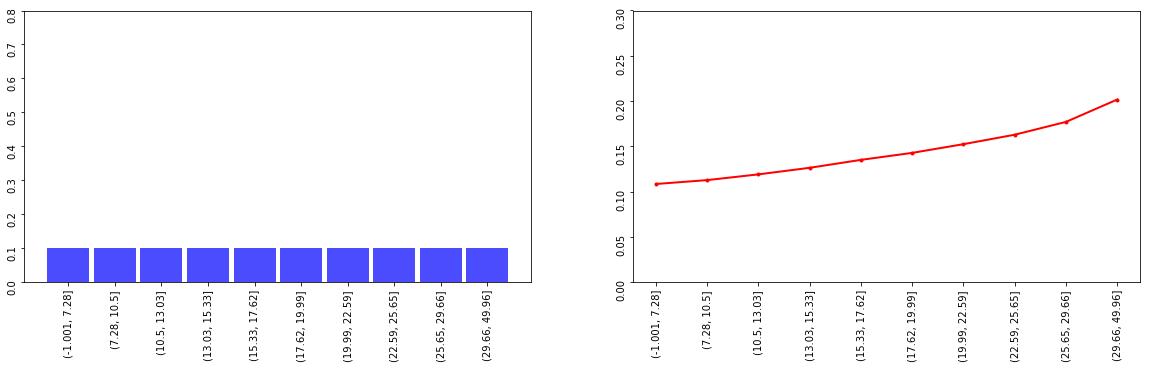

In [38]:
# 캔버스 생성
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 5))
fig.patch.set_facecolor('xkcd:white')

# x축 값 생성
xs_tmp = list(grp_df['dti'].values)
xs = list()
for x in xs_tmp:
  xs.append(str(x))

# 구성비 그래프 추가  
axes[0].bar(xs, height=grp_df['ratio'].values, color = 'b', width=0.9, align='center', alpha=0.7, )
axes[0].tick_params(labelrotation=90)
axes[0].set_ylim([0, 0.8])

# 불량율 그래프 추가
axes[1].plot(xs, grp_df['bad_rate'].values, color = 'r', marker='.', linestyle='-', linewidth=2)
axes[1].tick_params(labelrotation=90)
axes[1].set_ylim([0, 0.3])

#### twinx()

(0, 0.3)

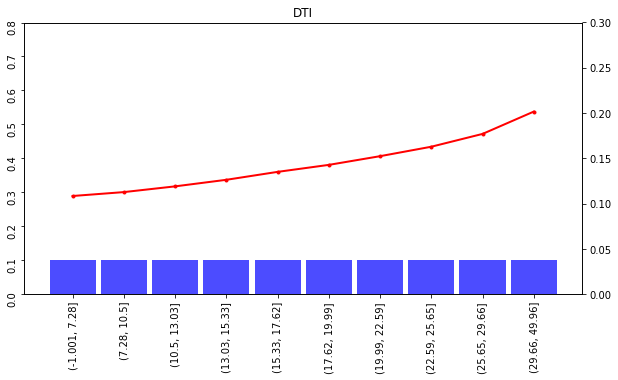

In [0]:
# 캔버스 생성
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')

# x축 값 생성
xs_tmp = list(grp_df['dti'].values)
xs = list()
for x in xs_tmp:
  xs.append(str(x))

# 구성비 그래프 추가  
axes.bar(xs, height=grp_df['ratio'].values, color = 'b', width=0.9, align='center', alpha=0.7, )
axes.tick_params(labelrotation=90)
axes.set_ylim([0, 0.8])
axes.set_title('DTI')

# 불량율 그래프 추가
ax_twin = axes.twinx()
ax_twin.plot(xs, grp_df['bad_rate'].values, color = 'r', marker='.', linestyle='-', linewidth=2)
ax_twin.set_ylim([0, 0.3])

#### twinx() & subplot

In [0]:
total_record_cnt = loan_seg_df.shape[0]
bins=[0, 1, 2, 3, 4, 5, 6, 7,8,9,100000]
grp_df_dict = dict()

# 등급별 요약표 생성
target_var = 'grade'
temp_df = loan_seg_df[[target_var, 'Y']].copy()
grp_df = temp_df.groupby([target_var], as_index=False).agg(
    {
        'Y': [('total_cnt', 'count'), ('bad_cnt', 'sum'), ]
    }
)
grp_df.columns = ['bin_name', 'total_cnt', 'bad_cnt']
grp_df['ratio'] = grp_df['total_cnt']/total_record_cnt
grp_df['bad_rate'] = grp_df['bad_cnt']/grp_df['total_cnt']
grp_df_dict['LC Grade'] = grp_df


# 최근2년내 30일이상 연체회수 요약표 생성
target_var = 'delinq_2yrs'
temp_df = loan_seg_df[[target_var, 'Y']].copy()
temp_df['bin_name'] = pd.cut(temp_df[target_var], bins, duplicates='drop', right=False)
grp_df = temp_df.groupby(['bin_name'], as_index=False).agg(
    {
        'Y': [('total_cnt', 'count'), ('bad_cnt', 'sum'), ]
    }
)
grp_df.columns = ['bin_name', 'total_cnt', 'bad_cnt']
grp_df['ratio'] = grp_df['total_cnt']/total_record_cnt
grp_df['bad_rate'] = grp_df['bad_cnt']/grp_df['total_cnt']
grp_df_dict['Deq Cnt in 2yr'] = grp_df


# 총 대출잔액(주택담보대출 제외) 요약표 생성
target_var = 'total_bal_ex_mort'
temp_df = loan_seg_df[[target_var, 'Y']].copy()
temp_df['bin_name'] = pd.qcut(temp_df[target_var], 10, duplicates='drop')
grp_df = temp_df.groupby(['bin_name'], as_index=False).agg(
    {
        'Y': [('total_cnt', 'count'), ('bad_cnt', 'sum'), ]
    }
)
grp_df.columns = ['bin_name', 'total_cnt', 'bad_cnt']
grp_df['ratio'] = grp_df['total_cnt']/total_record_cnt
grp_df['bad_rate'] = grp_df['bad_cnt']/grp_df['total_cnt']
grp_df_dict['LN Bal'] = grp_df


# dti 요약표 생성
target_var = 'dti'
temp_df = loan_seg_df[[target_var, 'Y']].copy()
temp_df['bin_name'] = pd.qcut(temp_df[target_var], 10, duplicates='drop')
grp_df = temp_df.groupby(['bin_name'], as_index=False).agg(
    {
        'Y': [('total_cnt', 'count'), ('bad_cnt', 'sum'), ]
    }
)
grp_df.columns = ['bin_name', 'total_cnt', 'bad_cnt']
grp_df['ratio'] = grp_df['total_cnt']/total_record_cnt
grp_df['bad_rate'] = grp_df['bad_cnt']/grp_df['total_cnt']
grp_df_dict['DTI'] = grp_df

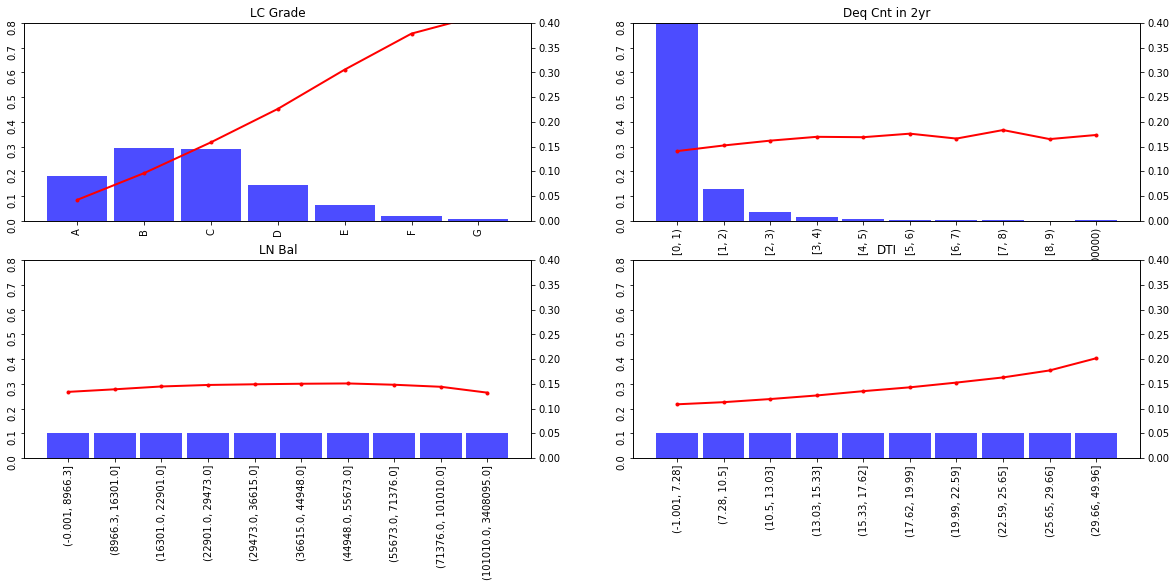

In [0]:
# 캔버스 생성
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(20, 8))
fig.patch.set_facecolor('xkcd:white')

subplot_cnt = 0
for key_col, grp_df in grp_df_dict.items():
  # x축 값 생성
  xs_tmp = list(grp_df['bin_name'].values)
  xs = list()
  for x in xs_tmp:
    xs.append(str(x))
    
  # subplot index 생성
  row_idx = int(subplot_cnt/2)
  col_idx = subplot_cnt % 2
  subplot_cnt = subplot_cnt + 1    

  # 구성비 그래프 추가  
  axes[row_idx, col_idx].bar(xs, height=grp_df['ratio'].values, color = 'b', width=0.9, align='center', alpha=0.7, )
  axes[row_idx, col_idx].tick_params(labelrotation=90)
  axes[row_idx, col_idx].set_ylim([0, 0.8])
  axes[row_idx, col_idx].set_title(key_col)

  # 불량율 그래프 추가
  ax_twin = axes[row_idx, col_idx].twinx()
  ax_twin.plot(xs, grp_df['bad_rate'].values, color = 'r', marker='.', linestyle='-', linewidth=2)
  ax_twin.set_ylim([0, 0.4])

In [0]:
grp_df_dict['LN Bal']

total_bal_ex_mort  total_cnt  bad_cnt     ratio  bad_rate
0       (-0.001, 8966.3]     196228    26228  0.100000  0.133661
1      (8966.3, 16301.0]     196228    27252  0.100000  0.138879
2     (16301.0, 22901.0]     196255    28376  0.100014  0.144587
3     (22901.0, 29473.0]     196209    28970  0.099991  0.147649
4     (29473.0, 36615.0]     196220    29237  0.099996  0.149001
5     (36615.0, 44948.0]     196236    29454  0.100004  0.150095
6     (44948.0, 55673.0]     196230    29574  0.100001  0.150711
7     (55673.0, 71376.0]     196218    29055  0.099995  0.148075
8    (71376.0, 101010.0]     196227    28248  0.100000  0.143956
9  (101010.0, 3408095.0]     196223    25910  0.099998  0.132044

### seaborn

* [seaborn](https://seaborn.pydata.org/index.html)
* [seaborn gallery](https://seaborn.pydata.org/examples/index.html)
* [seaborn 참고용 블로그](https://datascienceschool.net/view-notebook/4c2d5ff1caab4b21a708cc662137bc65/)

#### violinplot

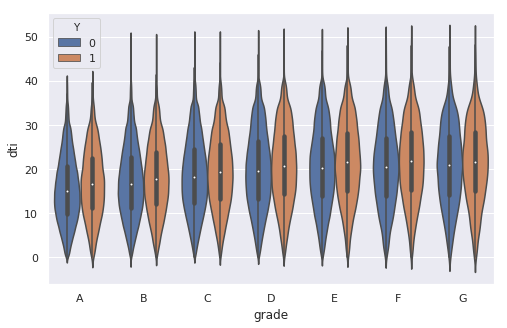

In [0]:
import seaborn as sns

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.violinplot(x="grade", y="dti", hue='Y',data=loan_seg_df, order=['A', 'B', 'C', 'D', 'E', 'F', 'G', ])

# 동일 등급내 정상/부도별 DTI크기 비교
# 모든 등급에서 부도의 DTI가 정상의 DTI보다 큼

#### heatmap

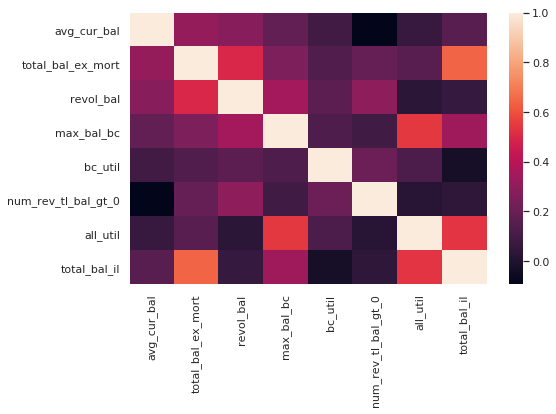

In [0]:
# 변수간 상관계수 차트
temp_num_cols = ['avg_cur_bal','total_bal_ex_mort','revol_bal','max_bal_bc','bc_util','num_rev_tl_bal_gt_0','all_util','total_bal_il',]
temp_df = loan_seg_df[temp_num_cols]
temp_corr = temp_df.corr()
ax = sns.heatmap(temp_corr)

## 그외 데이터 탐색

### 년도별 대출 실행 현황

* 년도별 대출실행 건수/금액 그리고 부도율 현황

In [0]:
# 년도 변수 생성
loan_seg_df['issue_yy'] = loan_seg_df['issue_yymm'].str[:4]

In [0]:
# 년도별 대출 건수/금액/부도건수/평균단가 집계
grp_df = loan_seg_df.groupby(['issue_yy'], as_index=False).agg(
    {
        'id': 'count', 
        'funded_amnt': 'sum',
        'Y': 'sum',
    }
)
rename_col_dict = {'id': 'total_ln_cnt', 'funded_amnt': 'total_ln_amt', 'Y': 'total_bad_cnt'}
grp_df.rename(columns=rename_col_dict, inplace=True)

# 부도율 변수 생성
grp_df['total_bad_rate'] = grp_df['total_bad_cnt']/grp_df['total_ln_cnt']

# 대출 1건당 평균 금액
grp_df['avg_ln_amt'] = grp_df['total_ln_amt']/grp_df['total_ln_cnt']
grp_df

issue_yy  total_ln_cnt  ...  total_bad_rate    avg_ln_amt
0      2007           600  ...        0.263333   7970.000000
1      2008          2393  ...        0.207271   8347.273297
2      2009          5281  ...        0.136906   9811.541375
3      2010         12536  ...        0.140077  10078.667438
4      2011         21721  ...        0.151789  11848.609640
5      2012         53367  ...        0.161973  13452.932055
6      2013        134804  ...        0.156012  14707.358832
7      2014        235602  ...        0.176726  14870.108064
8      2015        420576  ...        0.184105  15235.277928
9      2016        425604  ...        0.169712  14620.760026
10     2017        401144  ...        0.107814  14337.697560
11     2018        248646  ...        0.046866  15383.735009

[12 rows x 6 columns]

(0, 0.3)

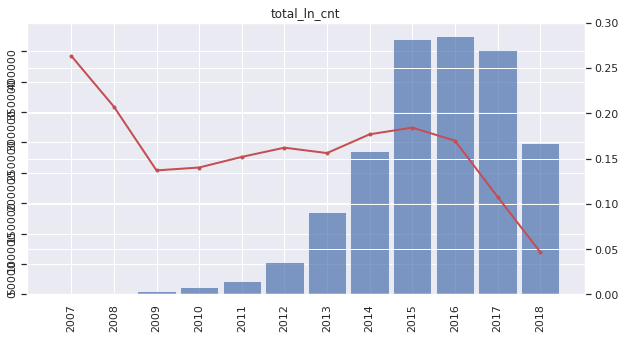

In [0]:
# 년도별 실행건, 부도율 추이

# 캔버스 생성
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 5))
fig.patch.set_facecolor('xkcd:white')

# x축 값 생성
xs_tmp = list(grp_df['issue_yy'].values)
xs = list()
for x in xs_tmp:
  xs.append(str(x))

# 구성비 그래프 추가  
axes.bar(xs, height=grp_df['total_ln_cnt'].values, color = 'b', width=0.9, align='center', alpha=0.7, )
axes.tick_params(labelrotation=90)
# axes.set_ylim([0, 0.8])
axes.set_title('total_ln_cnt')

# 불량율 그래프 추가
ax_twin = axes.twinx()
ax_twin.plot(xs, grp_df['total_bad_rate'].values, color = 'r', marker='.', linestyle='-', linewidth=2)
ax_twin.set_ylim([0, 0.3])